In [1]:
import math
import matplotlib.pyplot as plt
import random
from typing import Callable

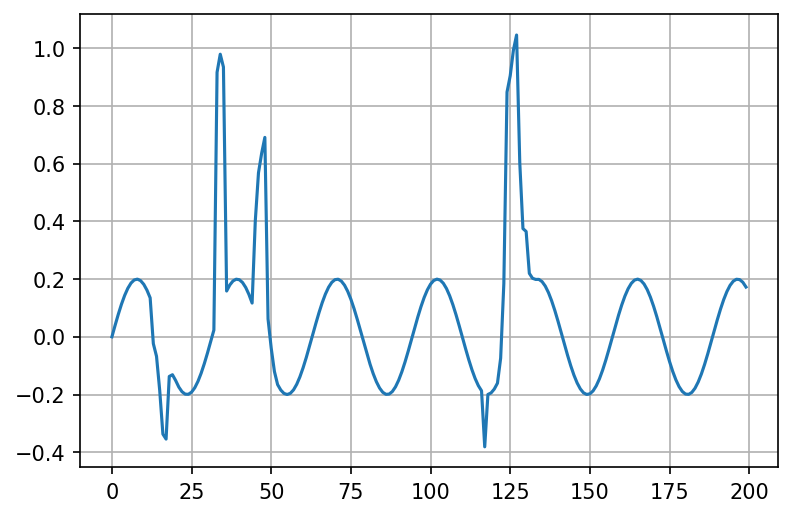

In [231]:
class SignalGenerator:
    data: list[float] = []
    x_list: list[int] = []
    file_name: str = "out.txt"

    def __init__(self, x_start: int = 0, x_end: int = 100) -> None:
        self._set_x_list(x_start, x_end)

    def _set_x_list(self, x_start: int, x_end: int):
        self.x_list = [x for x in range(x_start, x_end)]
        return self

    def _merge(self, data: list[float]):
        new_data = []
        for i in range(len(data)):
            current_data_item = 0
            try:
                current_data_item = self.data[i]
            except IndexError:
                pass
            new_data.append(data[i] + current_data_item)
        self.data = new_data

    def sin(self, a: float = 1, b: float = 1):
        self._merge([a * math.sin(x * b) for x in self.x_list])
        return self

    def cos(self, a: float = 1, b: float = 1):
        self._merge([a * math.cos(x * b) for x in self.x_list])
        return self

    def square_vawe(self, frequency: int = 10, height: int = 1):
        self._merge([height if (x % frequency) >= (frequency / 2) else 0 for x in self.x_list])
        return self

    def triangle_vawe(self, p: float = 50):
        self._merge([2 * math.fabs((x / p) - math.floor((x / p) + 0.5)) for x in self.x_list])
        return self

    def noise(self, y_min: float = -1, y_max: float = 1):
        self._merge([random.uniform(y_min, y_max) for _ in self.x_list])
        return self

    def linear(self, a: float = 1, b: float = 1):
        self._merge([a * x + b for x in self.x_list])
        return self

    def const(self, value = 0):
        self._merge([value for _ in self.x_list])
        return self

    def from_function(self, function: Callable[[int], float]):
        self._merge([function(x) for x in self.x_list])
        return self

    def with_peaks(self, 
        count: int = 1, 
        min_value: float = 0, 
        max_value: float = 1, 
        min_width: int = 1, 
        max_width: int = 10,
        direction: int = 1
    ):
        data = [0 for _ in self.x_list]
        for _ in range(count):
            x = random.randint(self.x_list[0], self.x_list[len(self.x_list) - 1])
            y = random.uniform(min_value, max_value)
            peak_y = y
            data[x] = y
            x_count = random.randint(min_width, max_width)
            last_y = min_value
            for i in reversed(range(math.floor(x_count / 2))):
                index = x - i - 1
                if index < 0:
                    continue
                y = random.uniform(last_y, peak_y)
                data[index] = y
                last_y = y
            last_y = peak_y
            for i in range(math.floor(x_count / 2)):
                index = x + i + 1
                if index > len(data) - 1:
                    continue
                y = random.uniform(last_y, min_value)
                data[index] = y
                last_y = y
        data = [y * direction for y in data]
        self._merge(data)
        return self

    def toFile(self):
        with open(self.file_name, 'w') as file:
            file.write(','.join(self.data))
        return self

    def draw(self):
        plt.figure(dpi=150)
        plt.plot(self.x_list, self.data)
        plt.grid()
        plt.show()
        return self

signal_generator = SignalGenerator(0, 200).with_peaks(3).with_peaks(3, direction=-1).sin(0.2, 0.2).draw()